Introduction to RADIS

In [1]:
from radis import calc_spectrum

The code below calculates the CO equilibrium spectrum from the HITRAN database, using the `calc_spectrum()` function.

`s` is a spectrum object.

Generating cached file: /home/pankaj/.astropy/cache/astroquery/Hitran/tempfile_CO_1_1895.00_2305.01.h5


/home/pankaj/anaconda3/envs/radis-dev/lib/python3.7/site-packages/pandas/core/generic.py:2505: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->bytes,key->block3_values] [items->Index(['globu', 'globl', 'locu', 'locl', 'lmix'], dtype='object')]

  encoding=encoding,


Generating cached file: /home/pankaj/.astropy/cache/astroquery/Hitran/tempfile_CO_2_1895.00_2305.01.h5
Generating cached file: /home/pankaj/.astropy/cache/astroquery/Hitran/tempfile_CO_3_1895.00_2305.01.h5
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 700 K
   Trot                 700 K
   Tvib                 700 K
   isotope              1,2,3
   mole_fraction        0.1
   molecule             CO
   path_length          1 cm
   pressure_mbar        1013.25 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state                X
   vib_distribution     boltzmann
   wavenum_max          2300.0000 cm-1
   wavenum_min          1900.0000 cm-1
Computation Parameters
----------------------------------------
   Tref                 296 K
   broadening_max_width  10 cm-1
   cutoff               1e-27 cm-1/(#.cm-2)
   dbformat             hitran
   dbpath               fetched from astroquery
   dlm_r

/home/pankaj/radis/radis/misc/warning.py:242: MissingSelfBroadeningWarning: Self-broadening temperature coefficient Tdpsel not given in database: used Tdpair instead
  warnings.warn(WarningType(message))


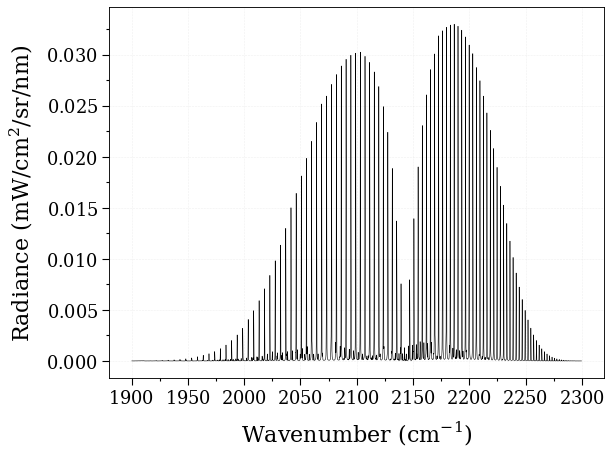

In [2]:
s = calc_spectrum(1900,2300,
                 molecule='CO',
                 isotope='1,2,3',
                 pressure=1.01325,
                 Tgas=700,
                 mole_fraction=0.1,
                 path_length=1,
                 )
s.apply_slit(0.5,'nm')
s.plot('radiance')

In [3]:
print(type(s))

<class 'radis.spectrum.spectrum.Spectrum'>


The code below calculates the CO non-equilibrium spectrum from the HITRAN database, with arbitrary units:

Using cache file: /home/pankaj/.astropy/cache/astroquery/Hitran/tempfile_CO_1_1895.00_2305.01.h5
Using cache file: /home/pankaj/.astropy/cache/astroquery/Hitran/tempfile_CO_2_1895.00_2305.01.h5
Using cache file: /home/pankaj/.astropy/cache/astroquery/Hitran/tempfile_CO_3_1895.00_2305.01.h5
Calculating Non-Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 300.0 K
   Trot                 300.0 K
   Tvib                 700.0 K
   isotope              1,2,3
   mole_fraction        0.1
   molecule             CO
   path_length          1.0 cm
   pressure_mbar        1013.25 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state                X
   vib_distribution     boltzmann
   wavenum_max          2300.0000 cm-1
   wavenum_min          1900.0000 cm-1
Computation Parameters
----------------------------------------
   Tref                 296 K
   broadening_max_width  10 cm-1
   cutoff               1e-27 cm-1

/home/pankaj/radis/radis/misc/warning.py:242: NegativeEnergiesWarning: There are negative rotational energies in the database
  warnings.warn(WarningType(message))
/home/pankaj/radis/radis/misc/warning.py:242: MissingSelfBroadeningWarning: Self-broadening temperature coefficient Tdpsel not given in database: used Tdpair instead
  warnings.warn(WarningType(message))


Spectrum calculated in 0.30s


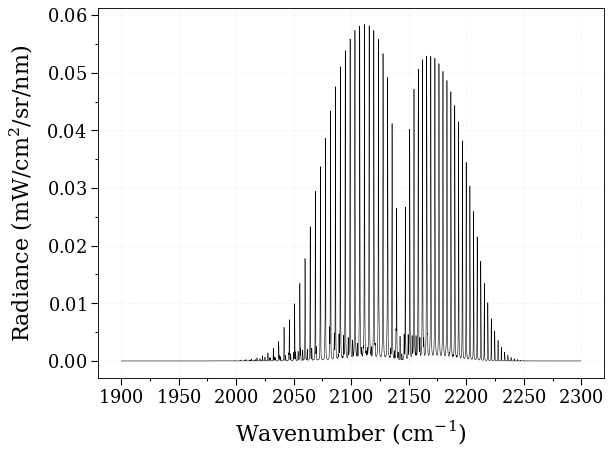

In [5]:
from astropy import units as u
s2 = calc_spectrum(1900/u.cm, 2300/u.cm,
                  molecule='CO',
                  isotope='1,2,3',
                  pressure=1.01325*u.bar,
                  Tvib=700*u.K,
                  Trot=300*u.K,
                  mole_fraction=0.1,
                  path_length=1*u.cm,
                  )
s2.apply_slit(0.5, 'nm')
s2.plot('radiance', nfig='same')

In [ ]:
from numpy import loadtxt
from radis import experimental_spectrum, plot_diff
w, I = loadtxt('')